In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp,log

In [2]:
df=pd.read_csv('binary_classifier_training_data.csv')
X_train=df[['feature_1','feature_2']].values
Y_train=df['label'].values

m, n=X_train.shape
print(f"The number of features: {n} || The number of training examples: {m}")


The number of features: 2 || The number of training examples: 200


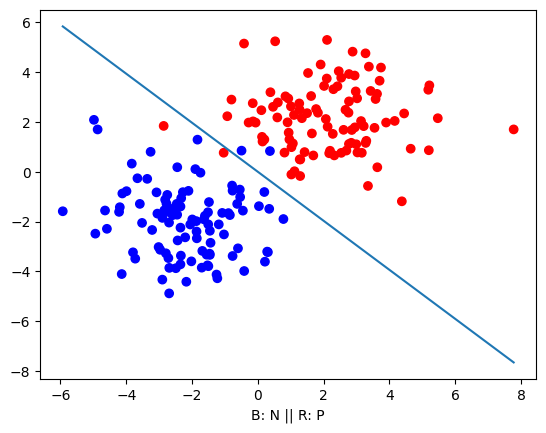

In [ ]:
''' My first attempt at the core calculations manually'''
b,w1,w2=0,0,0
lr=0.001
epochs=10
losses=[]
for epoch in range(epochs):
    for i in range(200):
        x1,x2,y=float(X_train[i][0]),float(X_train[i][1]),Y_train[i]
        
        z=b+ w1*x1 + w2*x2
        
        y_hat=1/(1+exp(-z))
        #the gradient is calculated using log loss (binary cross entropy loss)
        grad_w1=(y_hat-y)*x1
        grad_w2=(y_hat-y)*x2
        grad_b=(y_hat-y)
        
        w1=w1-lr*grad_w1
        w2=w2-lr*grad_w2
        b=b-lr*grad_b
        
        loss= -y*log(y_hat) -(1-y)*log(1-y_hat)
    losses.append(loss)
    
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='bwr')

x_values = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
y_values = (b - w1 * x_values) / w2

plt.plot(x_values, y_values)
plt.xlabel("B: N || R: P")
plt.show()



In [4]:
print('''I was able to find the line of seperation using Logistic Regression with 
a function made by myself. The loss dropped significatnly within 2-3 epochs.''')

I was able to find the line of seperation using Logistic Regression with 
a function made by myself. The loss dropped significatnly within 2-3 epochs.


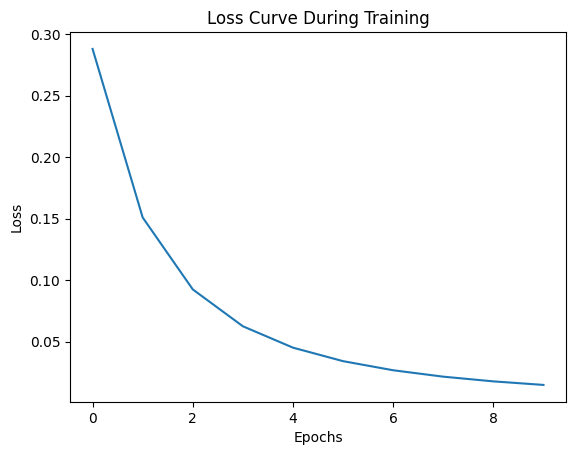

In [5]:
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.show()

In [6]:
print('''The following is an implementation i did using numpy for the computation. ''')

The following is an implementation i did using numpy for the computation. 


Data Visualisation: 


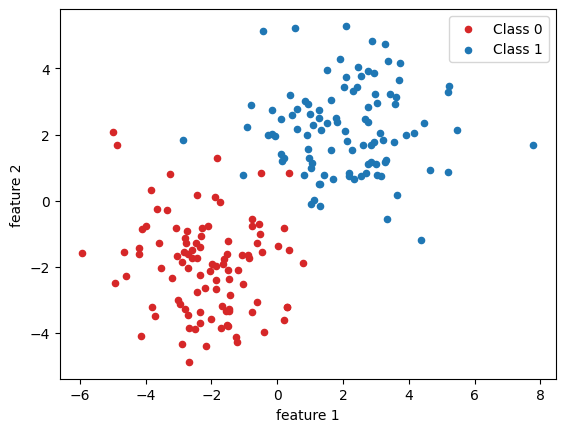

In [7]:
#implementation using numpy for scale:
'''Numpy implemetation:'''

plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1], color='tab:red', label='Class 0',s=20)
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1], color='tab:blue', label='Class 1',s=20)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
print("Data Visualisation: ")
plt.legend()
plt.show()


In [ ]:

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X, y, w, b):
    cost_sum=0

    for i in range(m):
        z = np.dot(w,X[i])+b
        y_hat = sigmoid(z)

        cost_sum += -y[i]*np.log(y_hat)-(1 - y[i])*np.log(1 - y_hat)

    return (1/m)*cost_sum

def gradient_function(X, y, w, b):
    grad_w=np.zeros(n)
    grad_b=0

    for i in range(m):
        z =np.dot(w,X[i])+b
        y_hat =sigmoid(z)

        grad_b += (y_hat-y[i])
        for j in range(n):
            grad_w[j] += (y_hat-y[i]) * X[i,j]

    grad_b = (1/m) * grad_b
    grad_w = (1/m) * grad_w

    return grad_b, grad_w

def gradient_descent(X, y, lr, epochs):
    w=np.zeros(n)
    b=0

    for i in range(epochs):
        grad_b, grad_w = gradient_function(X,y,w,b)

        w=w-lr*grad_w
        b=b-lr*grad_b

        if i%1000 == 0:
            print(f"Iteration {i}: Cost {cost_function(X, y, w, b)}")
    
    return w, b

def predict(X, w, b,threshold):
    preds=np.zeros(m)

    for i in range(m):
        z =np.dot(w, X[i])+ b
        y_hat =sigmoid(z)

        preds[i] = 1 if y_hat >= threshold else 0 #we do this only to evaluate models performance...
    
    return preds


In [18]:
"FINAL IMPLEMENTATION: "

learning_rate = 0.01
iterations = 10000
threshold=0.5

final_w, final_b = gradient_descent(X_train, Y_train, learning_rate, iterations)

predictions = predict(X_train, final_w, final_b,threshold)
accuracy = np.mean(predictions == Y_train) * 100
print(f"training accuracy: {accuracy:.2f}%")


Iteration 0: Cost 0.671491337438335
Iteration 1000: Cost 0.06271032298382324
Iteration 2000: Cost 0.05151758207283894
Iteration 3000: Cost 0.04727293971996605
Iteration 4000: Cost 0.045012682546982416
Iteration 5000: Cost 0.04360763170418161
Iteration 6000: Cost 0.0426513055752307
Iteration 7000: Cost 0.041960020974554944
Iteration 8000: Cost 0.04143833340525415
Iteration 9000: Cost 0.041031673918768094
training accuracy: 98.00%
